In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# L and n of trans

,CH1,CH2,CH4,time,Ts
0,-29.0,-0.054,-4.0,0.000000e+00,1.000000e-08
1,-30.0,-0.062,-4.0,1.000000e-08,NaN
2,-30.0,-0.050,-4.0,2.000000e-08,NaN
3,-31.0,-0.054,-4.4,3.000000e-08,NaN
4,-30.0,-0.058,-4.2,4.000000e-08,NaN
...,...,...,...,...,...
9995,22.0,-0.070,3.0,9.995000e-05,NaN
9996,23.0,-0.060,3.2,9.996000e-05,NaN
9997,20.0,-0.060,2.4,9.997000e-05,NaN
9998,22.0,-0.058,2.0,9.998000e-05,NaN


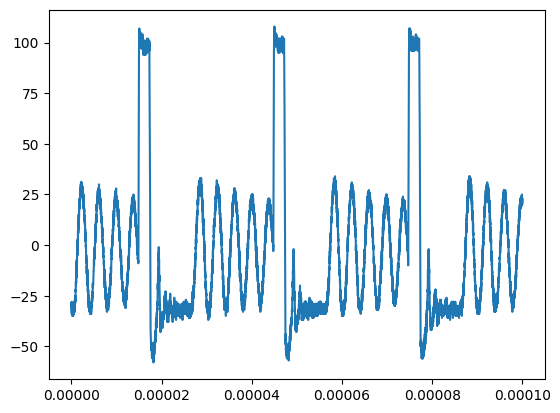

In [124]:
df= pd.read_csv("2025-12-21_12-40-09-517.csv")
Ts = df.Ts .values[0]
Vp = df.CH1.values
Ip = df.CH2.values
Vs = df.CH4.values
time = np.arange(0, len(Vp)*Ts, Ts)
plt.plot(time, Vp)
df

In [125]:
df= pd.read_csv("2025-12-21_12-42-45-746.csv")
Vp0 = df.CH1.values.mean()
Ip0= df.CH2.values.mean()
Vs0 = df.CH4.values.mean()
Vp0, Ip0, Vs0

(np.float64(-1.3056), np.float64(-0.0444282), np.float64(-0.6339199999999999))

In [126]:
Vp = Vp-Vp0
Vs = Vs-Vs0
Ip = Ip-Ip0

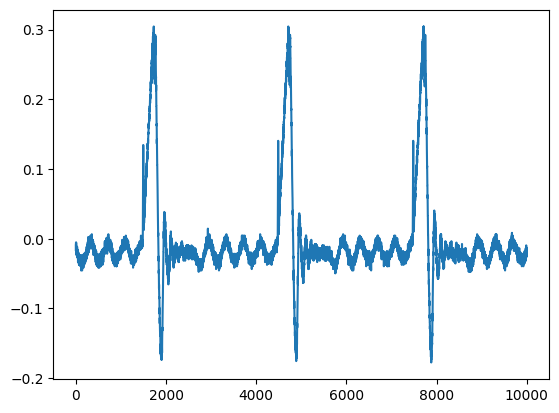

In [129]:
plt.plot(Ip)

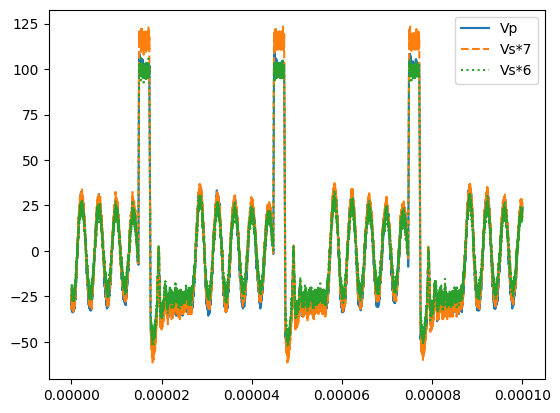

In [33]:

plt.plot(time, Vp, label = "Vp")
n= 7
plt.plot(time, n*Vs, label = f"Vs*{n}",  linestyle = "--")

n= 6
plt.plot(time, n*Vs, label = f"Vs*{n}",  linestyle = "dotted")
plt.legend()

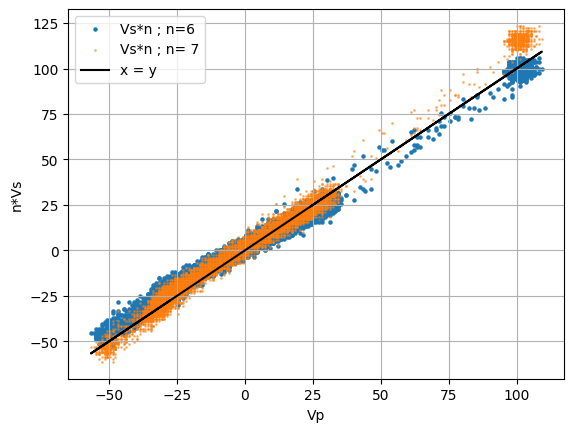

In [55]:
n= 6
plt.scatter(Vp, n*Vs, label = f"Vs*n ; n={n}", s= 5)

n= 7
plt.scatter(Vp, n*Vs, label = f"Vs*n ; n= {n}", s= 1, alpha = 0.5)
plt.plot(Vp, Vp, label = "x = y", c='k')
plt.legend()
plt.xlabel ("Vp")
plt.ylabel ("n*Vs")
plt.grid()

In [56]:
# n= 6

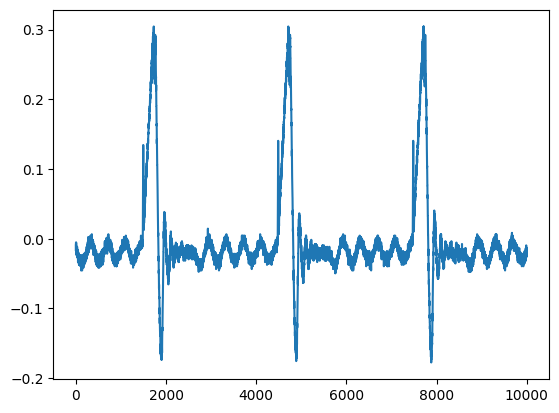

In [57]:
plt.plot(Ip)

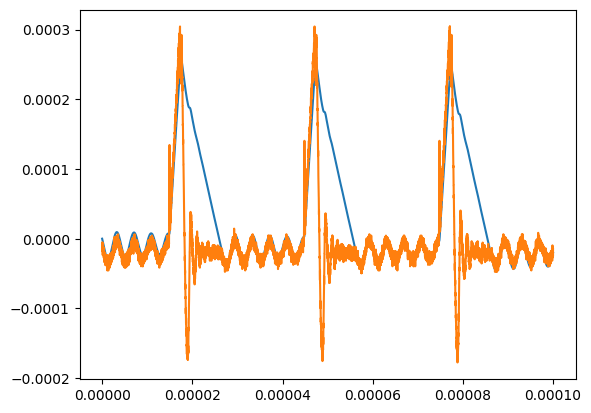

In [75]:
#scipy.integrate.cumtrapz(y, x=None, dx=1.0, axis=-1, initial=None)[source]
import  scipy
integVp = scipy.integrate.cumulative_trapezoid(y= Vp, dx=Ts,initial=0)
a= 1.7
integVp =integVp +a*time
plt.plot(time, integVp )
plt.plot(time, Ip*1e-3)

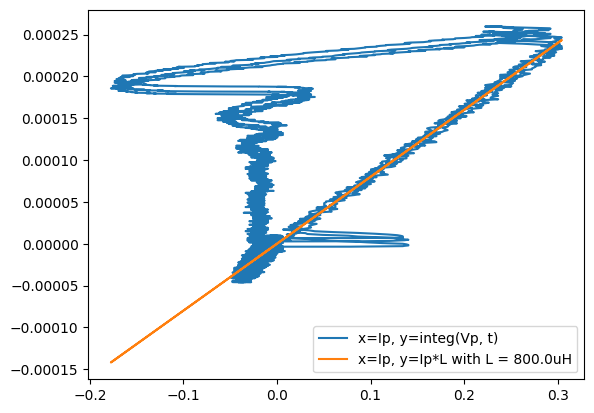

In [136]:
plt.plot(Ip, integVp,label =  "x=Ip, y=integ(Vp, t)")
L = 800e-6
# v = L di/dt
# L i = integ(v,t)
plt.plot(Ip, Ip*L,label =  f"x=Ip, y=Ip*L with L = {1e6*L}uH")
plt.legend()

In [137]:
#i = V*time * L 
# v = L di/dt
V= 360
i = V*(0.10/(132e3))/800e-6
i

0.3409090909090909

# spread spectrum

In [94]:


df= pd.read_csv("2025-12-21_13-11-14-365.csv")
Ts = df.Ts .values[0]
Vp = df.CH1.values
Ip = df.CH2.values
Vs = df.CH4.values
time = np.arange(0, len(Vp)*Ts, Ts)



df= pd.read_csv("2025-12-21_12-42-45-746.csv")
Vp0 = df.CH1.values.mean()
Ip0= df.CH2.values.mean()
Vs0 = df.CH4.values.mean()



Vp = Vp-Vp0
Vs = Vs-Vs0
Ip = Ip-Ip0

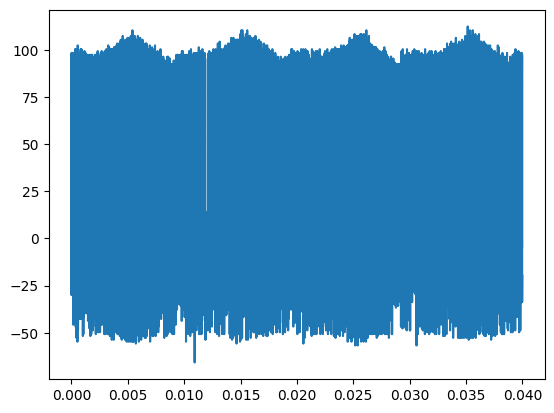

In [100]:
plt.plot(time, Vp)

(0.0, 0.001)

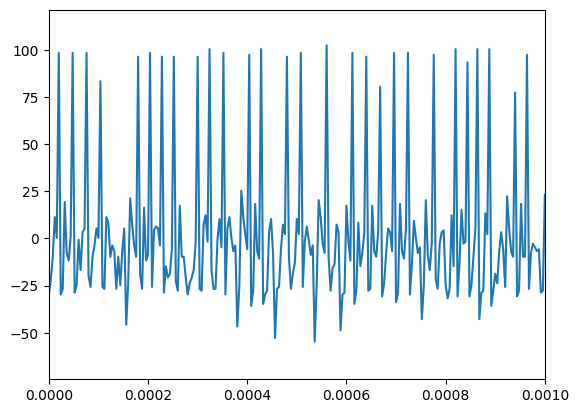

In [101]:
plt.plot(time, Vp)
plt.xlim([0,1e-3])

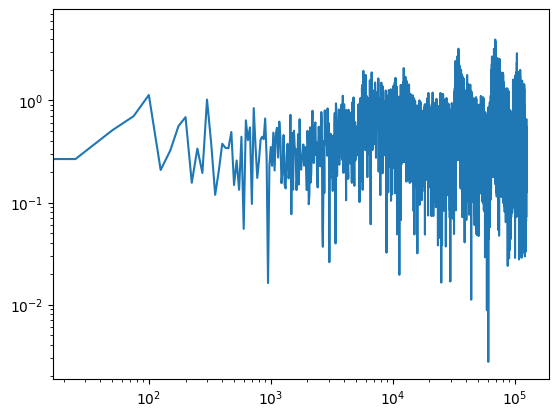

In [98]:
X = np.fft.fft(Vp)
f = np.fft.fftfreq(len(Vp), Ts)

mask = f >= 0
f = f[mask]
X_mag = 2.0 * np.abs(X[mask]) / len(Vp)
plt.plot(f, X_mag)
plt.xscale("log")
plt.yscale("log")

(10000.0, 100000.0)

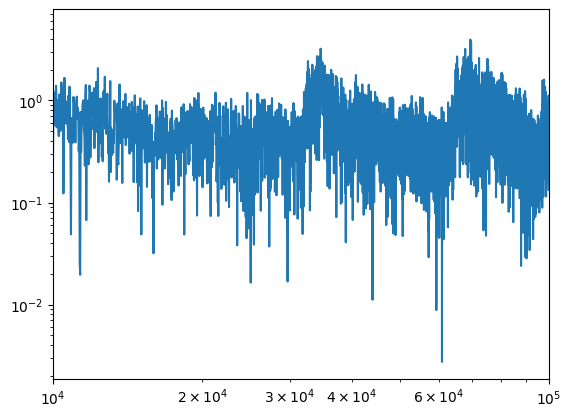

In [102]:
plt.plot(f, X_mag)
plt.xscale("log")
plt.yscale("log")
plt.xlim([10e3,100e3])

In [ ]:
# 2025-12-21_13-25-47-546.csv

In [103]:


df= pd.read_csv("2025-12-21_13-25-47-546.csv")
Ts = df.Ts .values[0]
Vp = df.CH1.values
Ip = df.CH2.values
Vs = df.CH4.values
time = np.arange(0, len(Vp)*Ts, Ts)



df= pd.read_csv("2025-12-21_12-42-45-746.csv")
Vp0 = df.CH1.values.mean()
Ip0= df.CH2.values.mean()
Vs0 = df.CH4.values.mean()



Vp = Vp-Vp0
Vs = Vs-Vs0
Ip = Ip-Ip0

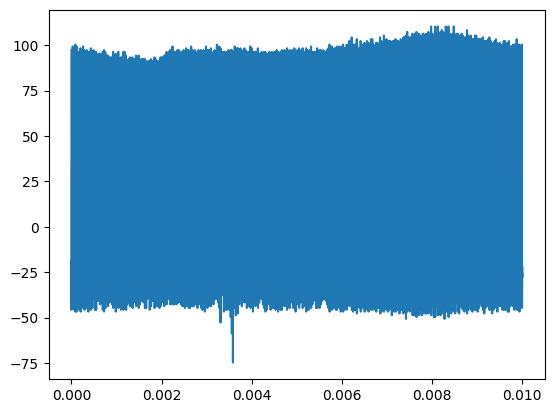

In [104]:
plt.plot(time, Vp)

(0.0, 0.001)

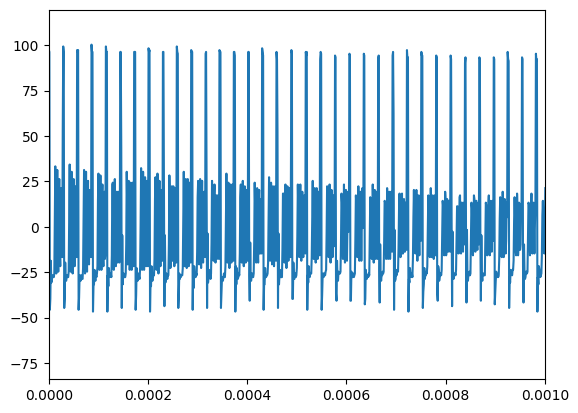

In [105]:
plt.plot(time, Vp)
plt.xlim([0,1e-3])

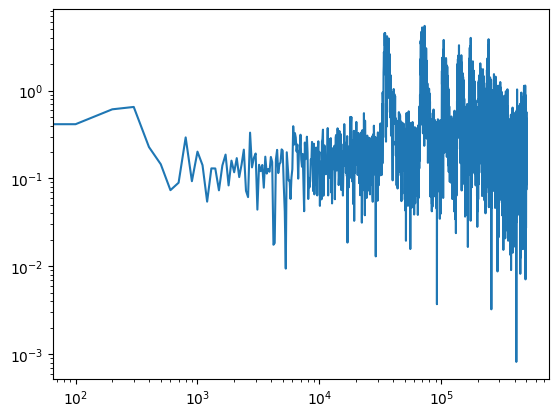

In [106]:
X = np.fft.fft(Vp)
f = np.fft.fftfreq(len(Vp), Ts)

mask = f >= 0
f = f[mask]
X_mag = 2.0 * np.abs(X[mask]) / len(Vp)
plt.plot(f, X_mag)
plt.xscale("log")
plt.yscale("log")

(10000.0, 100000.0)

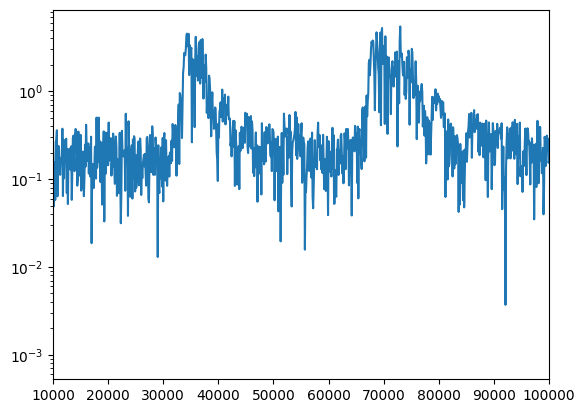

In [113]:
plt.plot(f, X_mag)
#plt.xscale("log")
plt.yscale("log")
plt.xlim([10e3,100e3])